<a href="https://colab.research.google.com/github/harrisuddin/F20DL/blob/main/F20DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets Discussion and Reasons to choose this dataset

FILL HERE...

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import requests
import io


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

In [13]:
raw_data_url = "https://raw.githubusercontent.com/harrisuddin/F20DL/main/Airbnb_Open_Data.csv"
def load_bnb_data(url=raw_data_url):
  # download the csv file from github
  download = requests.get(url).content

  # read the downloaded content and put into dataframe
  df = pd.read_csv(io.StringIO(download.decode("utf-8")), index_col=0) # doing index_col = 0 removes the first unnamed column

  return df

In [14]:
bnb_data = load_bnb_data()
bnb_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [15]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
bnb_data.info() 
#Q2 Can you tell if there are any missing values? If yes, which attributes contain missing values ? 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102599 entries, 1001254 to 6094647
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  object 
 3   host name                       102193 non-null  object 
 4   neighbourhood group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   country                         102067 non-null  object 
 9   country code                    102468 non-null  object 
 10  instant_bookable                102494 non-null  object 
 11  cancellation_policy             102523 non-null  object 
 12  room type

In [16]:
bnb_data["lat"].value_counts()
# Q3 What does the value_count() method display?

40.76411    36
40.71813    32
40.76125    28
40.73756    27
40.72440    25
            ..
40.57718     1
40.66649     1
40.62918     1
40.62845     1
40.84753     1
Name: lat, Length: 21991, dtype: int64

In [17]:
# This method shows a statistical summary of the numerical attributes 
bnb_data.describe() 

,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored.

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

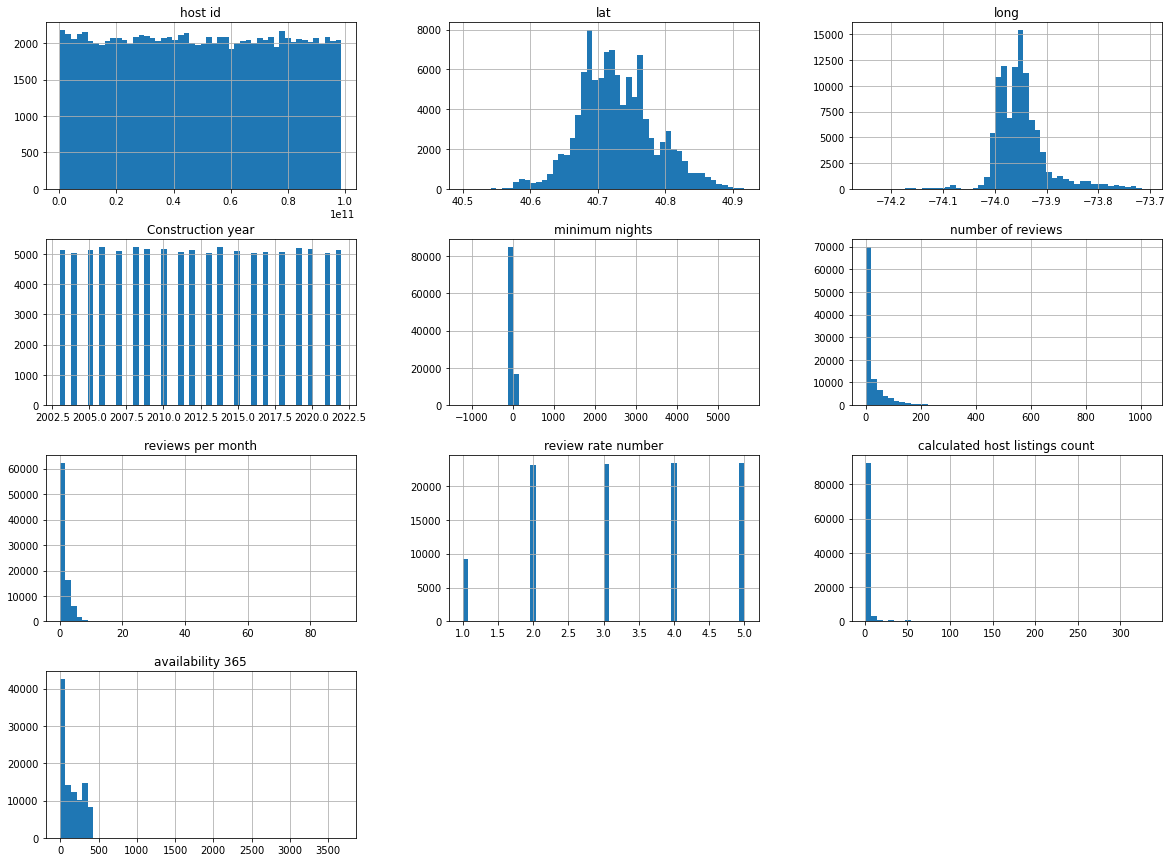

In [18]:
# To plot a histogram for each numerical attribute
bnb_data.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

#- host id is pointless to show like this
#- an near-equal number of 2, 3, 4, 5 star reviews which is annoying
#- same with construction year

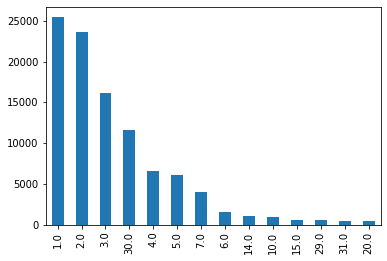

In [34]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?

# plotting the frequency of minimum required overnight stays per property
bnb_data['minimum nights'].value_counts()[:20]
bnb_data['minimum nights'].value_counts()[:20].plot.bar()

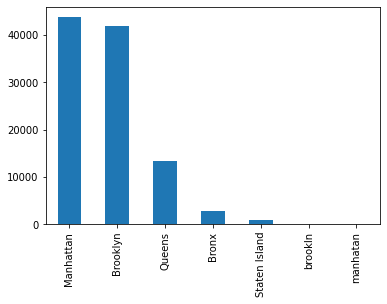

In [37]:
# plotting the frequency of property neighbourhoods
bnb_data['neighbourhood group'].value_counts()[:20]
bnb_data['neighbourhood group'].value_counts()[:20].plot.bar()

# those like 5 or so undercapitalised ones lol

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


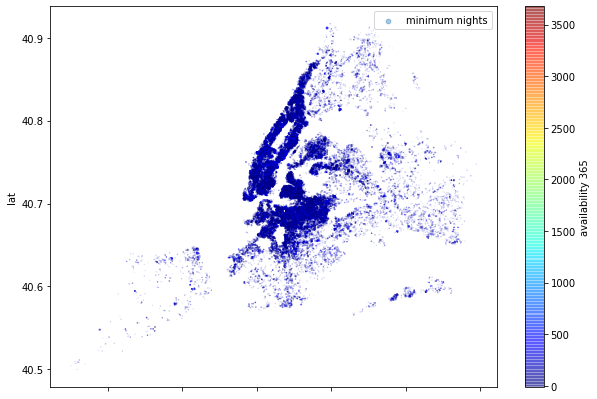

In [29]:
bnb_data.plot(kind="scatter", x="long", y="lat", alpha=0.4,
    s=bnb_data["minimum nights"]/100, label="minimum nights", figsize=(10,7),
    c="availability 365", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
#EXAMPLE plots California housing prices:red is expensive, blue is cheap. Large circles indicate areas with larger populations.
#EXAMPLE The radius of each circle represents the district’s population(option s) and the color represents the price (option c).

# plots the availability of a property against its longitude and latitude 


In [30]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = bnb_data.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [38]:
corr_matrix["review rate number"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

review rate number                1.000000
reviews per month                 0.037526
calculated host listings count    0.024273
long                              0.015283
Construction year                 0.004753
host id                           0.003459
minimum nights                   -0.002167
lat                              -0.003917
availability 365                 -0.006217
number of reviews                -0.018412
Name: review rate number, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd43a138ad0>,
      dtype=object)

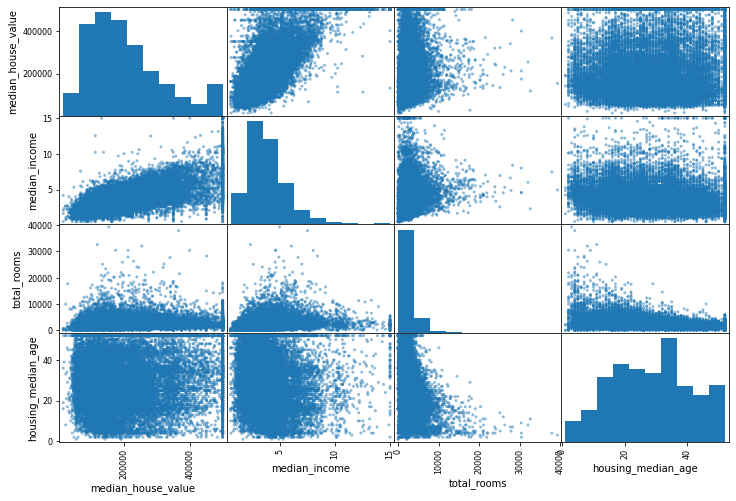

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(bnb_data[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(0.0, 16.0, 0.0, 550000.0)

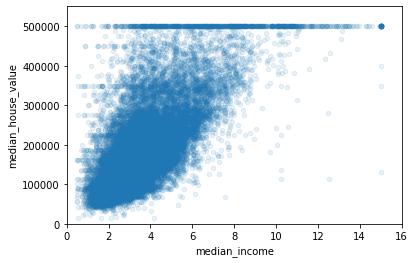

In [ ]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

# Experimenting with Attribute Combinations

In [ ]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
#Q10 Plot the scatter plot of the rooms_per_household against median_house_value
#Q11 Now use the housing describe method to view the statistical summary of the dataset 

# Prepare the Data for Machine Learning Algorithms

In [ ]:
#housing_labels = housing["median_house_value"].copy()
#housing = housing.drop("median_house_value", axis=1)  # drop the target label as we dont wan
# Now you will start by looking at your missing values
# First revert back to the original data set by dropping the new features  
housing = housing.drop("rooms_per_household", axis=1) 
housing = housing.drop("bedrooms_per_room", axis=1) 
housing = housing.drop("population_per_household", axis=1) 
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Cleaning
Dealing with missing features


1. Get rid of the corresponding districts. `dropna()`
2. Get rid of the whole attribute. `drop()` 
3. Set the values to some value (zero, the mean, the median, etc.)  `fillna()`


In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [ ]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  
#Q12 What is displayed below? Note your observation 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [ ]:
median = housing["total_bedrooms"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13


In [ ]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


## Scikit-Learn solution (optional)


In [ ]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [ ]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without ocean_prox
housing_num = housing.drop("ocean_proximity", axis=1) 

In [ ]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [ ]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [ ]:
housing_num.median().values #Check that this is the same as manually computing the median of each attribute


array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [ ]:
X = imputer.transform(housing_num) # transform the data set

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index) # load the new tranformed data set into the pandas frame housing_tr

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values] # show the rows with previously missing values 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0


### Handling Text and Categorical Attributes

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)  # look at the value of  'ocean_proximity' for the first 10 instances 

NameError: ignored

In [ ]:
housing_cat.tail(10)
# look at the value of  'ocean_proximity' for the last 10 instances

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?


In [ ]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


In [ ]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
type(housing_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

In [ ]:
housing_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

In [ ]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
cat_encoder.categories_         # Get a list of categories

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [ ]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the housing data set